In [1]:
year = 2023
day = 22

In [18]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data
# data = puzzle.examples[0].input_data

data = data.strip()
data = data.split("\n")
# data = []
data = [list(map(int, data.replace("~", ",").split(","))) for data in data]
# y, x, z
blocks = [((d[1], d[0], d[2]), (d[4], d[3], d[5])) for d in data]

In [19]:
grid = np.zeros((11, 11, 400), int)
for start, end in blocks:
    grid[start[0]: end[0] + 1, start[1]: end[1] + 1, start[2]: end[2] + 1] = 1

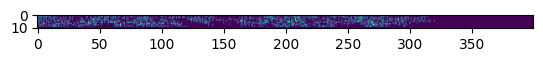

In [20]:
import matplotlib.pyplot as plt

plt.imshow(np.sum(grid, axis=1))

In [21]:
get_dim = lambda block, i: (block[0][i], block[1][i])
shift_down = lambda block: ((block[0][0], block[0][1], block[0][2] - 1), (block[1][0], block[1][1], block[1][2] - 1))
get_bottom_z_slice = lambda block: (
slice(block[0][0], block[1][0] + 1), slice(block[0][1], block[1][1] + 1), block[0][2])
get_block_slice = lambda block: (
slice(block[0][0], block[1][0] + 1), slice(block[0][1], block[1][1] + 1), slice(block[0][2], block[1][2] + 1))


def does_overlap(a, b):
    left = a if a[0] <= b[0] else b
    right = b if a[0] <= b[0] else a
    return left[1] >= right[0]


assert not does_overlap((1, 5), (6, 8))
assert not does_overlap((6, 8), (1, 5))
assert does_overlap((1, 5), (3, 8))
assert does_overlap((3, 8), (1, 5))
assert does_overlap((0, 2), (1, 1))

In [23]:
moving = True
new_blocks = blocks.copy()
for _ in range(1_000):
    moving = False
    blocks = sorted(new_blocks.copy(), key=lambda loc: loc[0][2])
    new_blocks = []
    for block in blocks:
        block_shifted_down = shift_down(block)
        # check if layer below block is empty
        if grid[*get_bottom_z_slice(block_shifted_down)].sum() == 0 and block[0][2] > 1:
            # print(f"moving {start} {end}")
            grid[*get_block_slice(block)] = 0
            grid[*get_block_slice(block_shifted_down)] = 1
            moving = True
            new_blocks.append(block_shifted_down)
        else:
            new_blocks.append(block)
    if not moving:
        print("done")
        break


done


In [24]:
from collections import defaultdict

supported_by_dict = defaultdict(list)

blocks = sorted(blocks, key=lambda loc: loc[0][2])
for i in range(len(blocks)):
    block = blocks[i]
    if block[0][2] == 1:
        supported_by_dict[i].append(-1)
        continue
    for j in range(i):
        block_below = blocks[j]

        block_x = get_dim(block, 0)
        block_y = get_dim(block, 1)
        block_z = get_dim(block, 2)
        block_below_x = get_dim(block_below, 0)
        block_below_y = get_dim(block_below, 1)
        block_below_z = get_dim(block_below, 2)

        x_y_overlap = does_overlap(block_x, block_below_x) and does_overlap(block_y, block_below_y)

        if x_y_overlap and block_z[0] == block_below_z[1]:
            raise ValueError

        if x_y_overlap and (block_z[0] - 1 == block_below_z[1]):
            supported_by_dict[i].append(j)

supported_by_dict

defaultdict(list,
            {0: [-1],
             1: [-1],
             2: [-1],
             3: [-1],
             4: [-1],
             5: [-1],
             6: [-1],
             7: [-1],
             8: [-1],
             9: [-1],
             10: [-1],
             11: [-1],
             12: [-1],
             13: [-1],
             14: [-1],
             15: [-1],
             16: [-1],
             17: [-1],
             18: [-1],
             19: [-1],
             20: [11],
             21: [2],
             22: [11],
             23: [0],
             24: [12],
             25: [3, 13],
             26: [14],
             27: [11],
             28: [19],
             29: [15],
             30: [1],
             31: [21],
             32: [22],
             33: [22],
             34: [24],
             35: [26],
             36: [25],
             37: [16],
             38: [8],
             39: [31],
             40: [31],
             41: [9, 32],
             42: [35],
 

Part a already solved with same answer: 398


In [29]:
supporting_dict = defaultdict(list)

for block, supported_by in supported_by_dict.items():
    for s in supported_by:
        supporting_dict[s].append(block)

In [30]:
count = 0
for i in range(len(blocks)):
    if all([len(supported_by_dict[s]) > 1 for s in supporting_dict[i]]):
        count += 1
count

398

In [31]:
submit(count, part="a", year=year, day=day)

Part a already solved with same answer: 398


In [41]:
chains = []
for i in range(len(blocks)):
# for i in [2]:
    disintegrated = {i}
    to_check = set(supporting_dict[i])
    while to_check:
        new_to_check = set()
        for candidate in to_check:
            if all(support in disintegrated for support in supported_by_dict[candidate]):
                disintegrated.add(candidate)
                new_to_check.update(supporting_dict[candidate])
        to_check = new_to_check
    chains.append(len(disintegrated) - 1)
answer = sum(chains)

In [42]:
submit(answer, part="b", year=year, day=day)

Part b already solved with same answer: 70727
